In [4]:
import matplotlib.pyplot as plt
import numpy as np

(-1.0, 4.0)

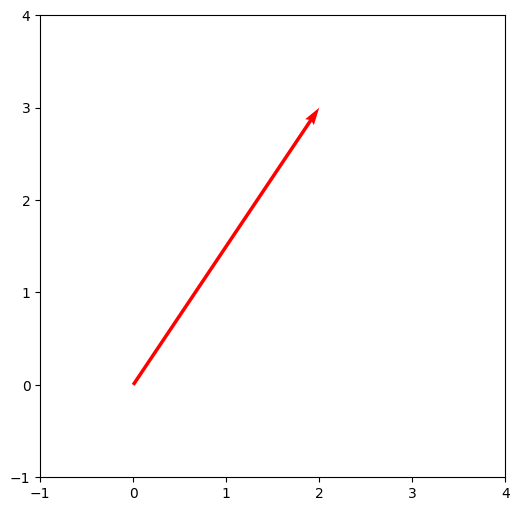

In [8]:
# Define the vector
v = np.array([2,3])

plt.figure(figsize=(6,6))
plt.quiver(0,0,v[0],v[1], angles='xy',scale_units='xy', scale=1,color='r',label='Vector v')
plt.xlim(-1, 4)
plt.ylim(-1, 4)

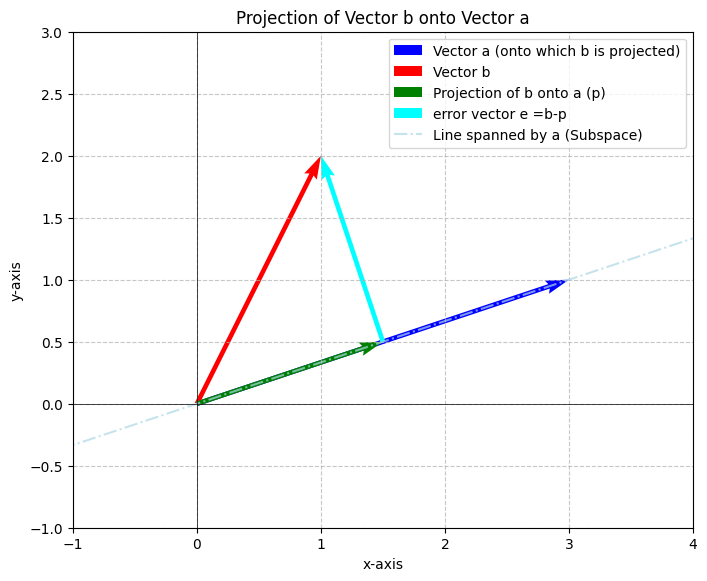

Vector a: [3 1]
Vector b: [1 2]
Projection of b onto a (p): [1.5 0.5]
Error vector (e = b - p): [-0.5  1.5]
Dot product of e and a (should be close to 0): 0.0


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define vectors a and b
a = np.array([3, 1])
b = np.array([1, 2])

# Calculate the projection of b onto a
# proj_a_b = (b.dot(a) / np.linalg.norm(a)**2) * a
proj_a_b = (np.dot(b, a) / np.dot(a, a)) * a

# Create the plot
plt.figure(figsize=(8, 8))

# Plot vector a
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector a (onto which b is projected)')
# Plot vector b
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector b')
# Plot the projection of b onto a
plt.quiver(0, 0, proj_a_b[0], proj_a_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Projection of b onto a (p)')

# Draw a dashed line from b to its projection (representing the error e = b - p)
e = b -proj_a_b
plt.quiver(proj_a_b[0],proj_a_b[1],e[0],e[1], angles='xy', scale_units='xy', scale=1, color='cyan', label='error vector e =b-p')

# Plot the line along vector a (the subspace)
line_x = np.linspace(-4, 4, 100) # Generate x-values for the line
line_y = (a[1]/a[0]) * line_x    # Corresponding y-values for the line along a
plt.plot(line_x, line_y, color='lightblue', linestyle='-.', alpha=0.7, label='Line spanned by a (Subspace)')


# Set plot limits and labels
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Projection of Vector b onto Vector a")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print(f"Vector a: {a}")
print(f"Vector b: {b}")
print(f"Projection of b onto a (p): {proj_a_b}")
print(f"Error vector (e = b - p): {b - proj_a_b}")
# Note: The error vector e should be orthogonal to a. Let's check their dot product:
print(f"Dot product of e and a (should be close to 0): {np.dot(b - proj_a_b, a)}")       

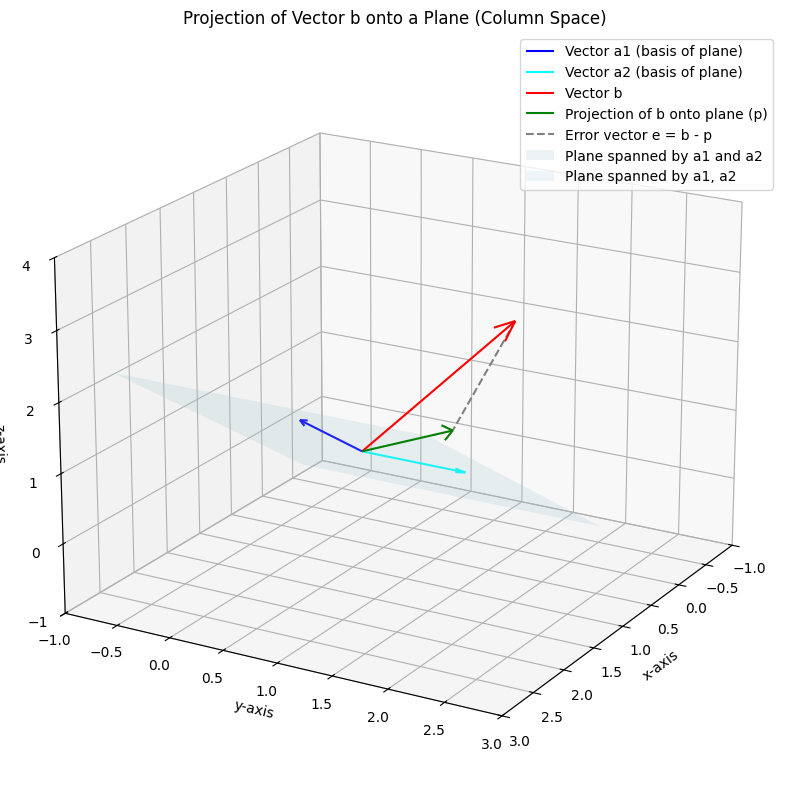

Vector a1: [1 0 1]
Vector a2: [0 1 0]
Vector b: [1 2 3]
Projection of b onto a1: [2. 0. 2.]
Projection of b onto a2: [0. 2. 0.]
Projection of b onto plane (p): [2. 2. 2.]
Error vector (e = b - p): [-1.  0.  1.]
Dot product of e and a1 (should be close to 0): 0.0
Dot product of e and a2 (should be close to 0): 0.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

# Define the orthogonal basis vectors for the plane (column space)
a1 = np.array([1, 0, 1])
a2 = np.array([0, 1, 0]) # a1 and a2 are orthogonal

# Ensure they are unit vectors for easier plane plotting (optional, but good practice for some methods)
# a1 = a1 / np.linalg.norm(a1)
# a2 = a2 / np.linalg.norm(a2)

# Define vector b to be projected
b = np.array([1, 2, 3])

# Calculate the projection of b onto a1
proj_a1_b = (np.dot(b, a1) / np.dot(a1, a1)) * a1

# Calculate the projection of b onto a2
proj_a2_b = (np.dot(b, a2) / np.dot(a2, a2)) * a2

# The projection p onto the plane spanned by a1 and a2 is the sum of individual projections
p = proj_a1_b + proj_a2_b

# Alternative calculation using the projection matrix P = A(A^T A)^-1 A^T
A = np.column_stack((a1, a2))
P = A @ np.linalg.inv(A.T @ A) @ A.T
p_matrix_method = P @ b
# print(f"Projection using matrix method: {p_matrix_method}") # Should be same as p

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot vector a1
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='blue', label='Vector a1 (basis of plane)', arrow_length_ratio=0.1)
# Plot vector a2
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='cyan', label='Vector a2 (basis of plane)', arrow_length_ratio=0.1)
# Plot vector b
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='red', label='Vector b', arrow_length_ratio=0.1)
# Plot the projection p
ax.quiver(0, 0, 0, p_matrix_method[0], p_matrix_method[1], p_matrix_method[2], color='green', label='Projection of b onto plane (p)', arrow_length_ratio=0.1)

# Draw a dashed line from b to its projection p (error vector e = b - p)
ax.plot([b[0], p[0]], [b[1], p[1]], [b[2], p[2]], linestyle='--', color='gray', label='Error vector e = b - p')

# Plot the plane spanned by a1 and a2
# Create a grid of points on the plane
# We need two parameters (s, t) such that any point on the plane is s*a1 + t*a2
s_vals = np.linspace(-1.5, 1.5, 10)
t_vals = np.linspace(-1.5, 1.5, 10)
S, T = np.meshgrid(s_vals, t_vals)

X = S * a1[0] + T * a2[0]
Y = S * a1[1] + T * a2[1]
Z = S * a1[2] + T * a2[2]

ax.plot_surface(X, Y, Z, alpha=0.2, color='lightblue', rstride=1, cstride=1, label='Plane spanned by a1 and a2')


# Set plot limits and labels
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
ax.set_zlim([-1, 4])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.set_title("Projection of Vector b onto a Plane (Column Space)")

# Add a legend. 3D legends can be tricky, adjust as needed or place manually.
# Due to a Matplotlib bug, plot_surface doesn't directly support labels for legends.
# We create a proxy artist for the legend.
from matplotlib.patches import Patch
proxy_plane = Patch(facecolor='lightblue', alpha=0.2, label='Plane spanned by a1, a2')
handles, labels = ax.get_legend_handles_labels()
handles.append(proxy_plane)
ax.legend(handles=handles)


# Set view angle for better visualization
ax.view_init(elev=20, azim=30) # Adjust elevation and azimuth angle

plt.show()

print(f"Vector a1: {a1}")
print(f"Vector a2: {a2}")
print(f"Vector b: {b}")
print(f"Projection of b onto a1: {proj_a1_b}")
print(f"Projection of b onto a2: {proj_a2_b}")
print(f"Projection of b onto plane (p): {p}")
print(f"Error vector (e = b - p): {b - p}")
# The error vector e should be orthogonal to both a1 and a2
print(f"Dot product of e and a1 (should be close to 0): {np.dot(b - p, a1)}")
print(f"Dot product of e and a2 (should be close to 0): {np.dot(b - p, a2)}")